In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import linregress

In [124]:
matlab_io_dir = '/home/anna/annaCode/MEK4600/artemis_data/data/14_10_2024/matlab_io'
df = pd.read_csv(os.path.join(matlab_io_dir,'results.csv'))
df['expected'] = 0.0123	
df.loc[3, 'expected'] = 0.041
df['freq'] = [1, 3, 2, 0.5, 0.5, 3]

df['mean -x'] *= -1
df['rmse x'] = np.sqrt((df['expected'] - df['mean x']) ** 2)
df['rmse -x'] = np.sqrt((df['expected'] - df['mean -x']) ** 2)
df['percent err'] = df['rmse x']/df['mean x'] * 100
df['percent err-'] = df['rmse -x']/df['mean -x'] * 100

df.sort_values(by="run_no", inplace=True)
df.head(10)

,run_no,mean x,mean -x,std x,std -x,expected,freq,rmse x,rmse -x,percent err,percent err-
0,3.0,0.012196,0.011876,0.002110,0.004055,0.0123,1.0,0.000104,0.000424,0.849515,3.574217
5,4.0,0.013072,0.012589,0.003897,0.003256,0.0123,3.0,0.000772,0.000289,5.908100,2.292683
1,5.0,0.011764,0.011173,0.003896,0.004234,0.0123,3.0,0.000536,0.001127,4.556560,10.087124
2,6.0,0.012112,0.009628,0.003791,0.009379,0.0123,2.0,0.000188,0.002672,1.548664,27.758139
3,7.0,0.041448,0.038229,0.008293,0.017048,0.0410,0.5,0.000448,0.002771,1.081350,7.247021
4,8.0,0.013567,0.012944,0.003507,0.004392,0.0123,0.5,0.001267,0.000644,9.341989,4.973783


In [125]:
small = df[df['run_no'] != 7].copy()
small.head(10)

,run_no,mean x,mean -x,std x,std -x,expected,freq,rmse x,rmse -x,percent err,percent err-
0,3.0,0.012196,0.011876,0.002110,0.004055,0.0123,1.0,0.000104,0.000424,0.849515,3.574217
5,4.0,0.013072,0.012589,0.003897,0.003256,0.0123,3.0,0.000772,0.000289,5.908100,2.292683
1,5.0,0.011764,0.011173,0.003896,0.004234,0.0123,3.0,0.000536,0.001127,4.556560,10.087124
2,6.0,0.012112,0.009628,0.003791,0.009379,0.0123,2.0,0.000188,0.002672,1.548664,27.758139
4,8.0,0.013567,0.012944,0.003507,0.004392,0.0123,0.5,0.001267,0.000644,9.341989,4.973783


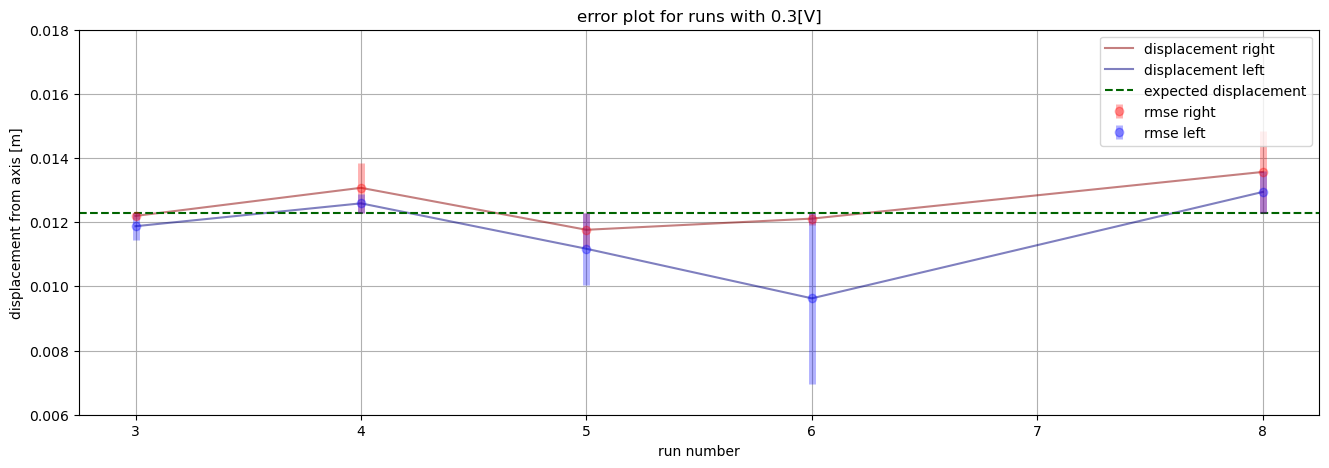

In [135]:
fig, (ax ) = plt.subplots(1,1, figsize=(16, 5))

ax.set_ylim(0.006, 0.018)  
ax.set_ylim(0.006, 0.018)  
ax.plot(small["run_no"], small['mean x'], label="displacement right", color="darkred", alpha = 0.5)
ax.plot(small["run_no"], small['mean -x'], label="displacement left", color="navy", alpha = 0.5)
ax.axhline(y=0.0123, color='darkgreen', linestyle='--', label='expected displacement')
#ax.axhline(y=small["expected"], color='darkred', linestyle='--', label='expected displacement')

ax.errorbar(small["run_no"], small['mean x'], yerr =  small["rmse x"], elinewidth=5,  fmt ='ro', label = "rmse right", alpha = 0.3)
ax.errorbar(small["run_no"], small['mean -x'], yerr =  small["rmse -x"],elinewidth=5, fmt ='bo', label = "rmse left", alpha = 0.3)
ax.grid()
ax.set_ylabel("displacement from axis [m]")
ax.set_xlabel("run number")
ax.set_title("error plot for runs with 0.3[V]")

_ = ax.legend()


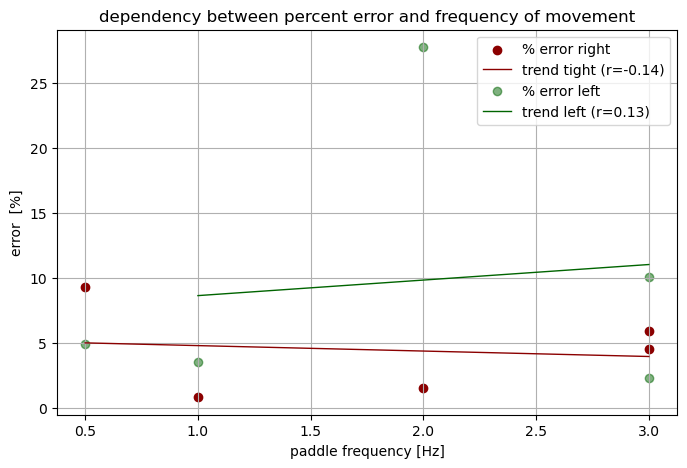

In [138]:
fig, (ax ) = plt.subplots(1,1, figsize=(8, 5))
ax.set_ylabel("displacement from axis [m]")
ax.set_xlabel("paddle frequency [Hz]")

ax.scatter(small["freq"], small['percent err'], label="% error right", color="darkred",)
slope, intercept, r_value, _, _ = linregress(small['freq'], small['percent err'])
x_line = np.linspace(min(small['freq']), max(small['freq']), 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, color="darkred", linewidth = 1, label=f"trend tight (r={r_value:.2f})") 



ax.scatter(small["freq"], small['percent err-'], label="% error left", color="darkgreen", alpha = 0.5)
slope, intercept, r_value, _, _ = linregress(small['freq'], small['percent err-'])
x_line = np.linspace(min(right['freq']), max(small['freq']), 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, color="darkgreen", linewidth = 1, label=f"trend left (r={r_value:.2f})") 


ax.set_ylabel("error  [%]")
ax.set_xlabel("paddle frequency [Hz]")
ax.set_title("dependency between percent error and frequency of movement")
ax.legend()
ax.grid()


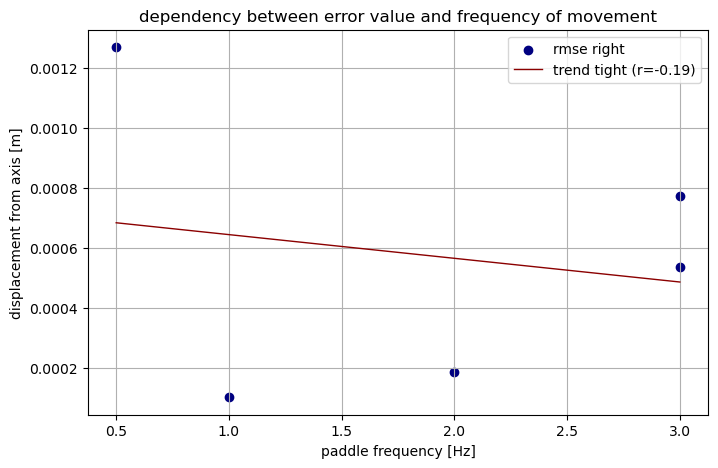

In [137]:
fig, (ax ) = plt.subplots(1,1, figsize=(8, 5))
ax.set_ylabel("displacement from axis [m]")
ax.set_xlabel("paddle frequency [Hz]")

ax.scatter(small["freq"], small['rmse x'], label="rmse right", color="navy",)
slope, intercept, r_value, _, _ = linregress(small['freq'], small['rmse x'])
x_line = np.linspace(min(small['freq']), max(small['freq']), 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, color="darkred", linewidth = 1, label=f"trend tight (r={r_value:.2f})") 


'''
ax.scatter(small["freq"], small['rmse -x'], label="rmse left", color="darkgreen", alpha = 0.5)
slope, intercept, r_value, _, _ = linregress(small['freq'], small['rmse -x'])
x_line = np.linspace(min(right['freq']), max(small['freq']), 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, color="darkgreen", linewidth = 1, label=f"trend left (r={r_value:.2f})") 
'''

ax.set_ylabel("displacement from axis [m]")
ax.set_xlabel("paddle frequency [Hz]")
ax.set_title("dependency between error value and frequency of movement")
ax.legend()
ax.grid()


In [69]:
small.head(10)

,run_no,mean x,mean -x,std x,std -x,expected,rmse x,rmse -x,freq
0,3.0,0.012196,0.011876,0.002110,0.004055,0.0123,0.000104,0.000424,1.0
5,4.0,0.013072,0.012589,0.003897,0.003256,0.0123,0.000772,0.000289,3.0
1,5.0,0.011764,0.011173,0.003896,0.004234,0.0123,0.000536,0.001127,2.0
2,6.0,0.012112,0.009628,0.003791,0.009379,0.0123,0.000188,0.002672,0.5
4,8.0,0.013567,0.012944,0.003507,0.004392,0.0123,0.001267,0.000644,3.0
